# EDA Latam Challenge!

![Alt text](../docs/png-transparent-orlando-international-airport-latam-airlines-group-latam-chile-latam-brasil-logo-snapchat-purple-blue-violet.png)

- Author: Alan Matys
- Linkedin: https://www.linkedin.com/in/alanmatys/

In [1]:
# Import necesary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
# We define the module path in order to be able to call the .py functions in the module
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
# We iimport the functions to read the csv file (read_df), add the synthetic_features (synthetic_features), and the geo data(geo_data)
# To see the functions look for the make_data/input_data.py
from make_data.input_data import read_df, synthetic_features, geo_data

In [4]:
# We read the csv file
df = read_df()
df.head()

There is/are NaN in these Rows
 Fecha-I      False
Vlo-I        False
Ori-I        False
Des-I        False
Emp-I        False
Fecha-O      False
Vlo-O         True
Ori-O        False
Des-O        False
Emp-O        False
DIA          False
MES          False
AÑO          False
DIANOM       False
TIPOVUELO    False
OPERA        False
SIGLAORI     False
SIGLADES     False
dtype: bool
The row that has the NaN is:
                  Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O  \
6068 2017-01-19 11:00:00   200  SCEL  SPJC   LAW 2017-01-19 11:03:00   NaN   

     Ori-O Des-O Emp-O  DIA  MES   AÑO  DIANOM TIPOVUELO  \
6068  SCEL  SPJC   56R   19    1  2017  Jueves         I   

                     OPERA  SIGLAORI SIGLADES  
6068  Latin American Wings  Santiago     Lima  

There are no duplicate rows


Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0  KMIA   AAL    1    1  2017    Domingo         I  American Airlines   
1  KMIA   AAL    2    1  2017      Lunes         I  American Airlines   
2  KMIA   AAL    3    1  2017     Martes         I  American Airlines   
3  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines   
4  KMIA   AAL    5    1  2017     Jueves         I  American Airlines   

   SIGLAORI SIGLADES  
0  Santiago    Miami  
1  Santiago    Miami  
2  Santiago    Miami  
3  Santiago    Miami  
4  Santiago    Miami

In this case it's just one row on the flight number, so we will skip it for the time being

# 2) Synthetic Features

We add the requested features with their specific criteria:
1) high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.

2) min_diff : difference in minutes between Date-O and Date-I .

3) delay_15 : 1 if min_diff > 15, 0 if not.

4) period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based
onDate-I .

In [5]:
df = synthetic_features(df)
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...   AÑO     DIANOM  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...  2017    Domingo          I  American Airlines  Santiago   
1  KMIA   AAL  ...  2017      Lunes          I  American Airlines  Santiago   
2  KMIA   AAL  ...  2017     Martes          I  American Airlines  Santiago   
3  KMIA   AAL  ...  2017  Miercoles          I  American Airlines  Santiago   
4  KMIA   AAL  ...  2017     Jueves          I  American Airlines  Santiago   

  SIGLADES high_season min_diff  delay_15  period_day  
0    Miami           1      3.0         0       night  
1    Miami           1      9.0         0       night  
2    Miami           1      9.0         0       night  
3    Miami           1      3.0         0       night  
4    Miami           1     -2.0         0       night  

[5 rows x 22 columns]

## Extra Features

We will add some features from the dataset and exogenous sources.

- distance: geodesic distance between the origin and the destination, using geopy data
- country_des: country of destination

In [6]:
df = geo_data(df)
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...  high_season  min_diff  delay_15 period_day   Dest  \
0  KMIA   AAL  ...            1       3.0         0      night  Miami   
1  KMIA   AAL  ...            1       9.0         0      night  Miami   
2  KMIA   AAL  ...            1       9.0         0      night  Miami   
3  KMIA   AAL  ...            1       3.0         0      night  Miami   
4  KMIA   AAL  ...            1      -2.0         0      night  Miami   

       Orig     distance    country_des  des_long    des_lat  
0  Santiago  1801.048899  United States -80.19362  25.774173  
1  Santiago  1801.048899  United States -80.19362  25.774173  
2  Santiago  1801.048899  United States -80.19362  25.774173  
3  Santiago  1801.048899  United States -80.19362  25.774173  
4  Santiago  1801.048899  United States -80.19362  25.774173  

[5 rows x 28 columns]

## 1) EDA (Exploratory Data Analysis)

In this section we try to describe the categorical and the numerical variables

### Categorical Features

In [12]:
def programed_vs_operated(df:pd.DataFrame):
    """

    Plot the comparision of the Programed features vs the Operated features

    Parameters
    --------------------

    - df: pandas.DataFrame
        Pandas DataFrame containing the this columns:
        - Origin Variables (Ori-I/Ori-O)
        - Destination Variables (Des-I/Des-O)
    
    """
    fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20,12))

    fig.suptitle('Programmed vs Operation')

    sns.countplot(x=df["Ori-I"],
                order = df['Ori-I'].value_counts().index,
                ax=axes[0,0],
                color='red',
                alpha=0.7)

    sns.countplot(x=df["Ori-O"],
                order = df['Ori-O'].value_counts().index,
                ax=axes[0,1],
                color='blue',
                alpha=0.7)

    sns.countplot(x=df["Des-I"],
                order = df['Des-I'].value_counts().index,
                ax=axes[1,0],
                color='red',
                alpha=0.7)
    axes[1,0].tick_params(axis='x', rotation=90)

    sns.countplot(x=df["Des-O"],
                order = df['Des-O'].value_counts().index,
                ax=axes[1,1],
                color='blue',
                alpha=0.7)
    axes[1,1].tick_params(axis='x', rotation=90)

    dis_des = round((len(df[df['Des-I'] != df['Des-O']])/len(df)) * 100,2)

    axes[1,1].text(.4, .70,
                    f'{dis_des}% of the flights that ended on a different destination',
                    ha='left',
                    va='top',
                    color='blue',
                    transform=axes[1,1].transAxes)

    sns.countplot(x=df["Emp-I"],
                order = df['Emp-I'].value_counts().index,
                ax=axes[2,0],
                color='red',
                alpha=0.7)
    axes[2,0].tick_params(axis='x', rotation=90)

    sns.countplot(x=df["Emp-O"],
                order = df['Emp-O'].value_counts().index,
                ax=axes[2,1],
                color='blue',
                alpha=0.7)
    axes[2,1].tick_params(axis='x', rotation=90)

    dis_emp = round((len(df[df['Emp-I'] != df['Emp-O']])/len(df)) * 100,2)

    axes[2,1].text(.4, .70,
                    f'{dis_emp}% of the flights that have a diifferent Airline Code',
                    ha='left',
                    va='top',
                    color='blue',
                    transform=axes[2,1].transAxes)

    plt.show()

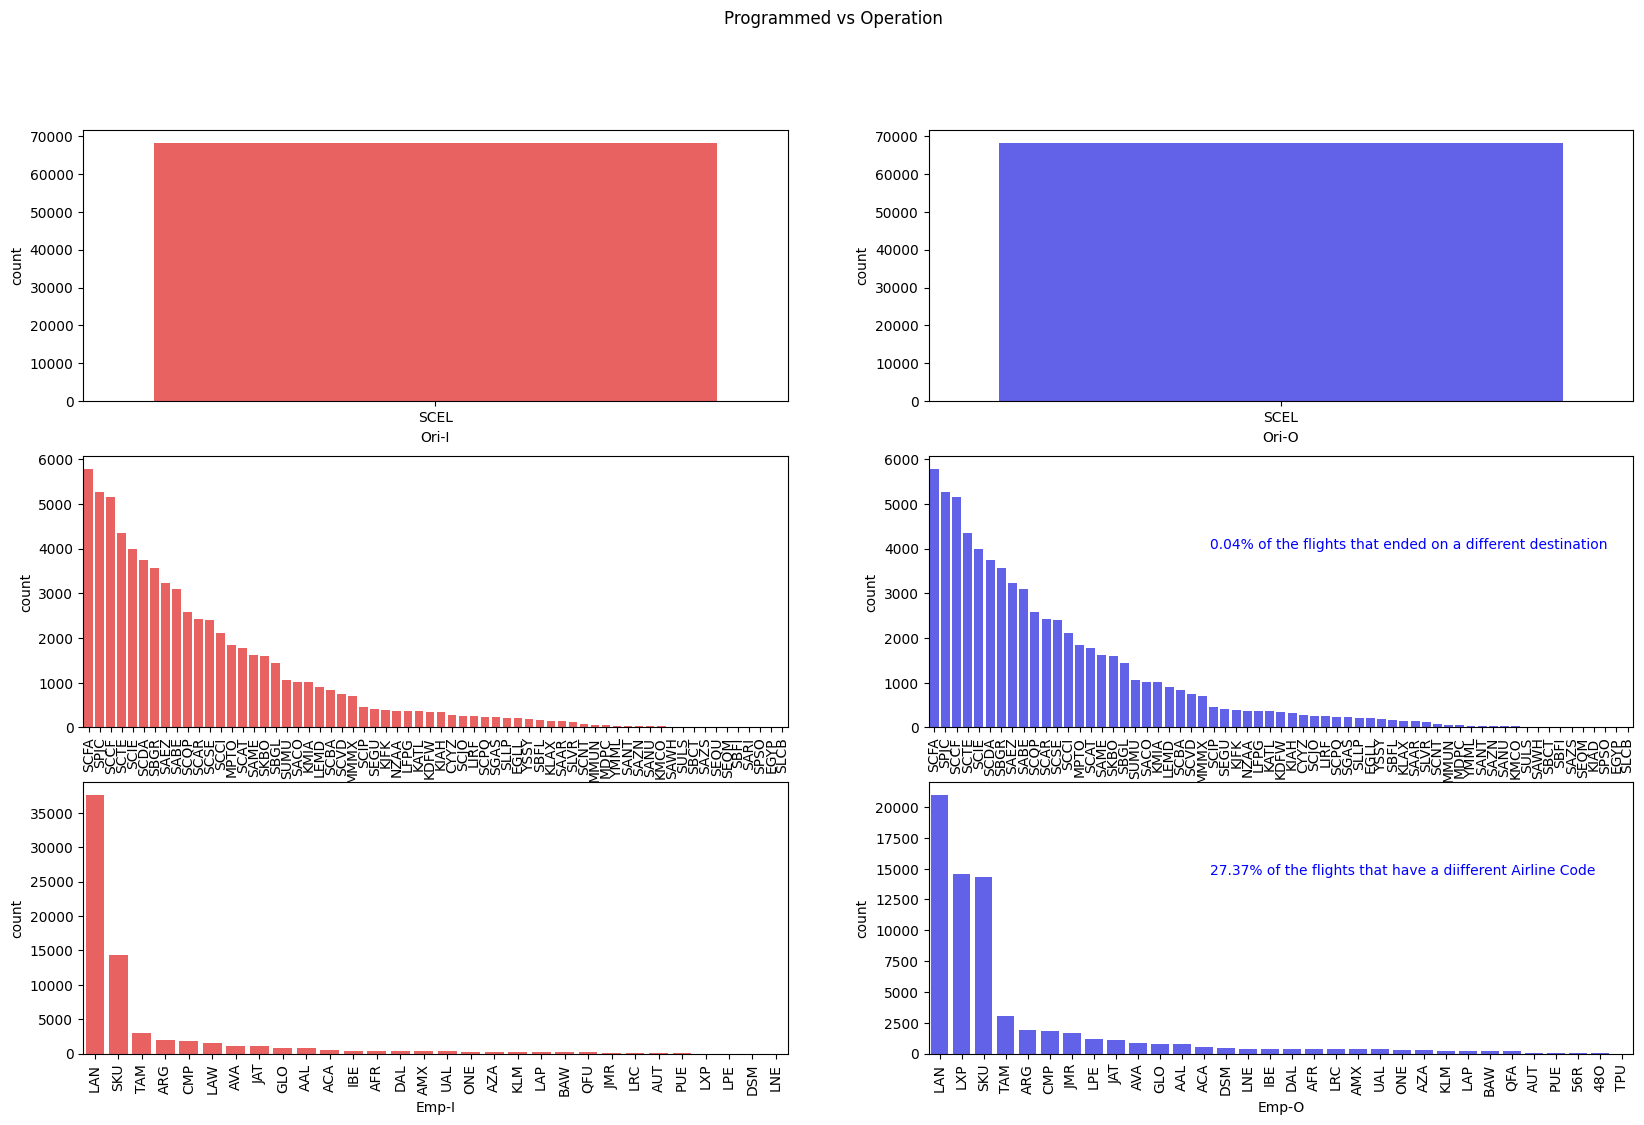

In [13]:
programed_vs_operated(df)

From this chart we can take the following insights
- More than 1/4 flights had a different airline code from the one that was programed.
- There are some flights, not usually, that ended on a different destination, based on the destination code

In [61]:
def other_categorical(df):
    """

    Plot other categorical Variables of the LATAM Dataframe

    Parameters
    --------------------
    df: pandas.Dataframe
        Latam Dataframe containing the 'TIPOVUELO', 'DIANOM', 'SIGLADES', 'OPERA' columns

    Returns
    -------------------
    None
    
    """
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,10))

    sns.histplot(x=df["TIPOVUELO"],
                    multiple="dodge", 
                    stat = 'percent',
                    shrink = 0.8,
                    common_norm=False,
                    ax = axes[0,0])
    
    axes[0,0].set_title('CHART 1')

    sns.histplot(x=df["DIANOM"],
                    multiple="dodge", 
                    stat = 'percent',
                    shrink = 0.8,
                    ax = axes[0,1],
                    discrete=True,
                    hue = df['TIPOVUELO'])

    axes[0,1].get_legend().remove()
    axes[0,1].set_title('CHART 2')

    sns.countplot(x=df['SIGLADES'],
                ax = axes[1,0],
                order = df['SIGLADES'].value_counts().index,
                hue= df['TIPOVUELO']
                )

    axes[1,0].tick_params(axis='x', rotation=90)
    axes[1,0].set(xlabel=None)
    axes[1,0].set_title('CHART 3')

    sns.histplot(x=df["OPERA"],
                    multiple="dodge", 
                    stat = 'percent',
                    shrink = 0.8,
                    ax = axes[1,1],
                    discrete=True,
                    hue = df['TIPOVUELO'])

    axes[1,1].tick_params(axis='x', rotation=90)
    axes[1,1].set(xlabel=None)
    axes[1,1].set_title('CHART 4')


    plt.show()

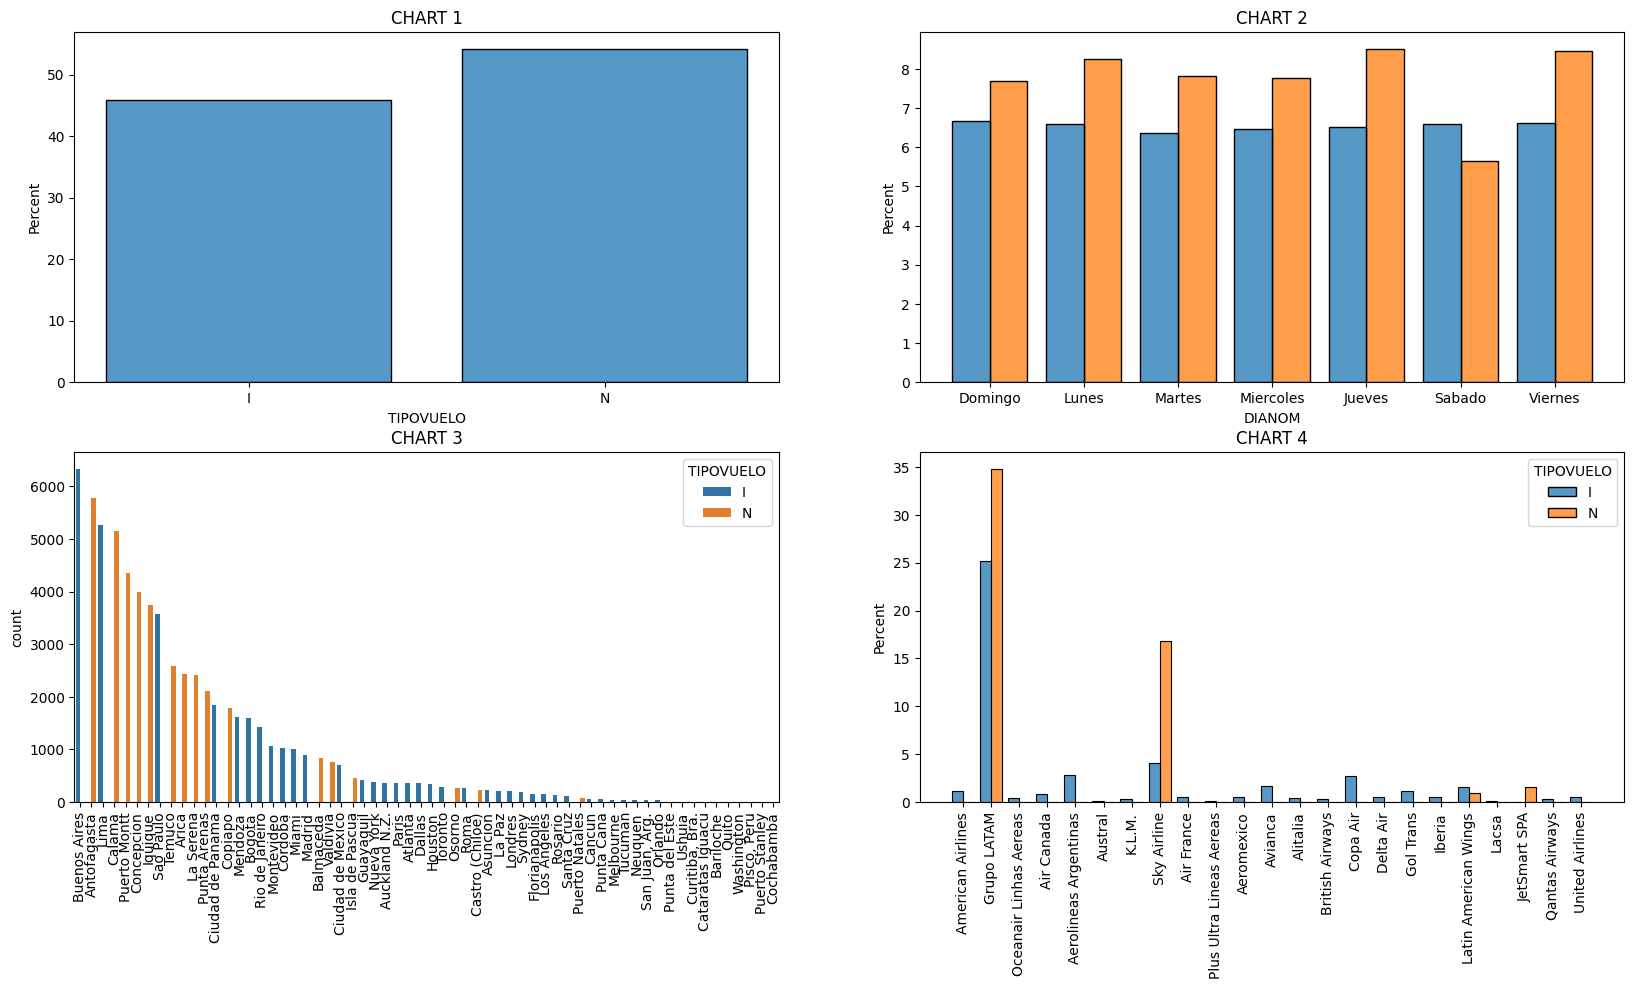

In [62]:
other_categorical(df)

From this chart we can take the following insights:
- FROM **Chart 1**:

There are more National Flights (within Chile) than International Flights (from SCL to another country), but more or less is equivalent.

- From **Chart 2**:

International flights are uniform in terms of the day of the flight, but for National flights it's not the same, there are significantly fewer flights on Saturdays and the proportion changes on this day (More Int flights)

- From **Chart 3**:

The top destination is Buenos Aires, the second place is for Antofagasta. On the top 10 flights most of them are national flights.

- From **Chart 4**:

Latam clearly dominates both National and International Flights in SCL. On second place we have Sky Airline with a significant market on National and some on International. With Latam & Sky we have ~ 80% of the flights

The others seem far from Top 2 players


### Consistency of results in time

We examine if the dominance from both airlines and destinations has persisted in time for the full year or from certain perioid and on they gained full dominance.

In [63]:
def time_s_airlines(df, var):
    """ 
    
    """
    fig, ax = plt.subplots(nrows=4, figsize=(20, 28))

    plot = df.groupby([df["Fecha-I"].dt.date, df[var]]).agg(vuelos=("Vlo-I", "count"))

    sns.lineplot(plot, x="Fecha-I", y="vuelos", hue=var, ax=ax[0])

    ax[0].set_title("Flights per Day")
    ax[0].set(xlabel=None)

    sns.move_legend(
        ax[0], loc="center left", bbox_to_anchor=(1, 0.7), ncol=2, title=None
    )

    plot_2 = (
        df[~df.OPERA.isin(["Grupo LATAM", "Sky Airline"])]
        .groupby([df["Fecha-I"].dt.date, df[var]])
        .agg(vuelos=("Vlo-I", "count"))
    )

    sns.lineplot(plot_2, x="Fecha-I", y="vuelos", hue=var, ax=ax[1])

    sns.move_legend(
        ax[1], loc="center left", bbox_to_anchor=(1, 0.7), ncol=2, title=None
    )

    ax[1].set_title("Flights Excluding LATAM & Sky")
    ax[1].set(xlabel=None)

    df_nac = df[df["TIPOVUELO"] == "N"]

    plot_nac = df_nac.groupby([df_nac["Fecha-I"].dt.date, df[var]]).agg(
        vuelos=("Vlo-I", "count")
    )

    sns.lineplot(plot_nac, x="Fecha-I", y="vuelos", hue=var, ax=ax[2])

    sns.move_legend(
        ax[2],
        loc="center left",
        bbox_to_anchor=(1, 0.9),
        ncol=2,
        title=None,
        fancybox=True,
        shadow=True,
    )

    ax[2].set_title("Nac Flights")
    ax[2].set(xlabel=None)

    df_int = df[df["TIPOVUELO"] == "I"]

    plot_int = df_int.groupby([df_int["Fecha-I"].dt.date, df[var]]).agg(
        vuelos=("Vlo-I", "count")
    )

    sns.lineplot(plot_int, x="Fecha-I", y="vuelos", hue=var)

    ax[3].set_title("Int Flights")
    ax[3].set(xlabel=None)

    sns.move_legend(
        ax[3], loc="center left", bbox_to_anchor=(1, 0.7), ncol=2, title=None
    )

    plt.show()

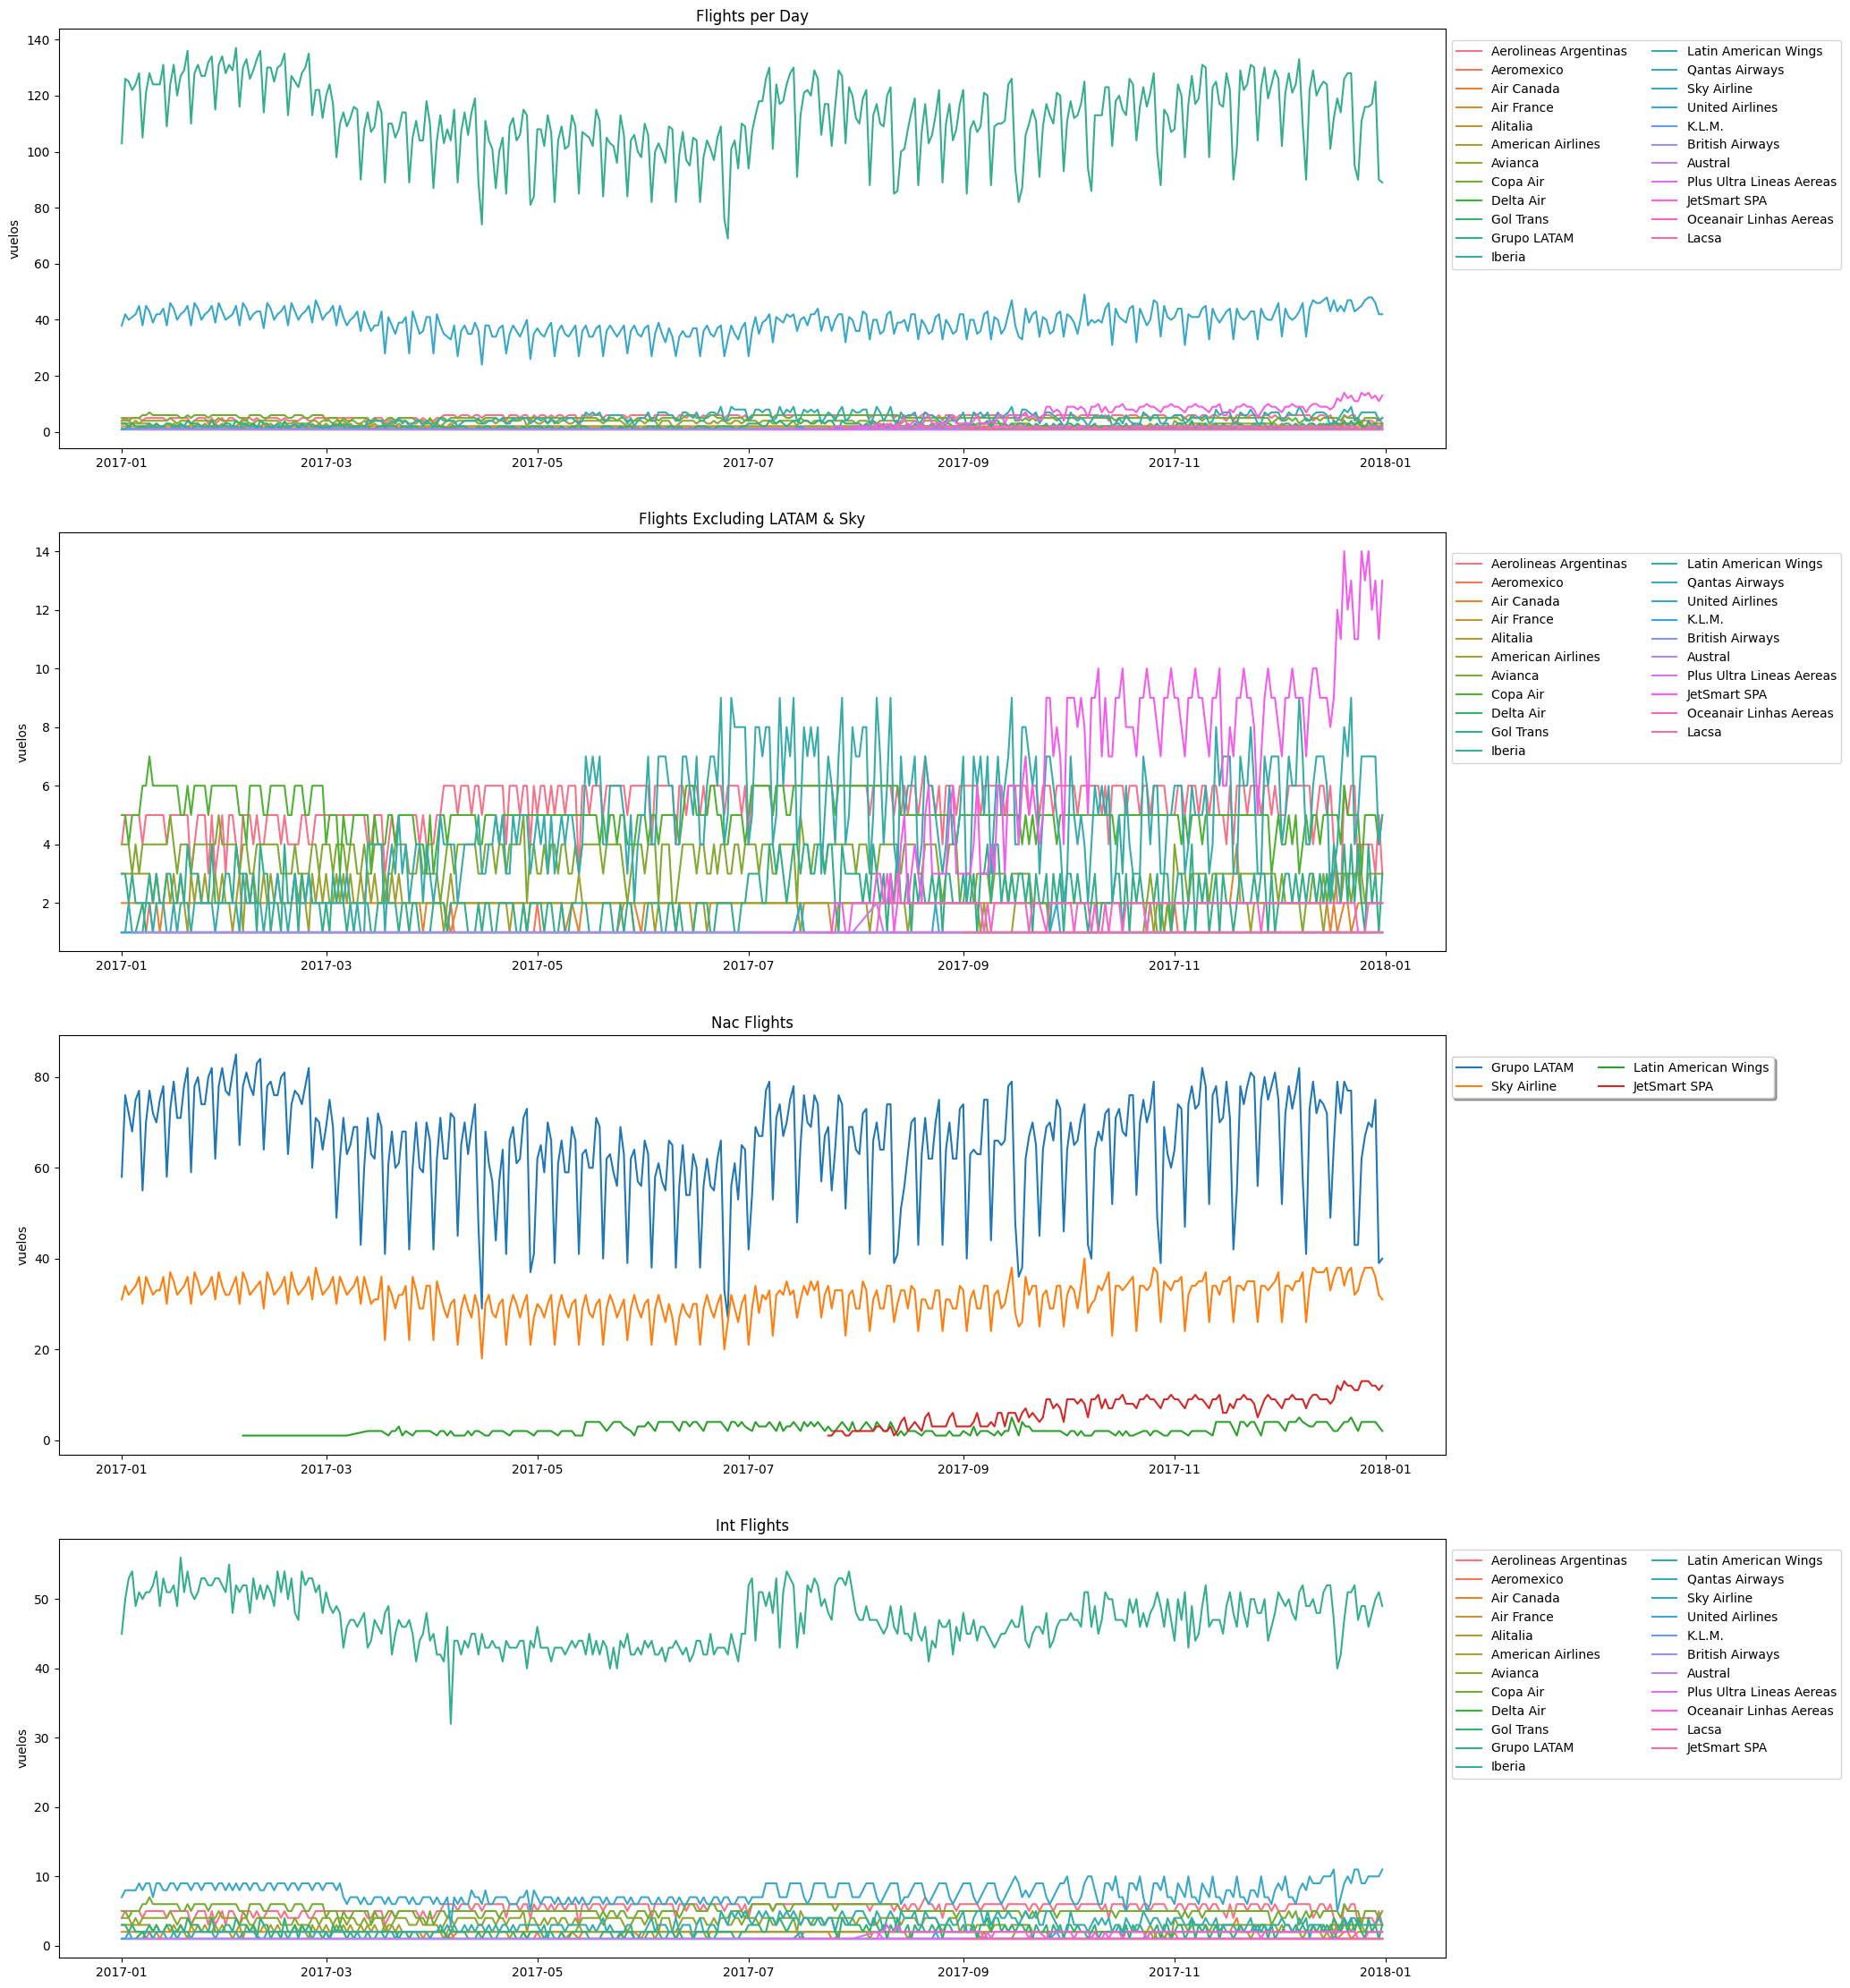

In [64]:
time_s_airlines(df,'OPERA')

From this chart we can extract the following insights:

- **Flights per day:** The dominance in this market from LATAM and Sky persists over time and does not differenciate in any specific period. It may have a 

- **Flighs Excluding LATAM & Sky:** There are significantly fewer flights from other airlines, most of them are not higher than 8 flights. JetSmart has surged since August significantly

- **Nac Flights:** The dominance of LATAM & Sky in the domestic market is persisted over the year, but there are not that amount of players.

- **Int Flights:** LATAM dominates also international market but Sky is not that differenciated from the other players.

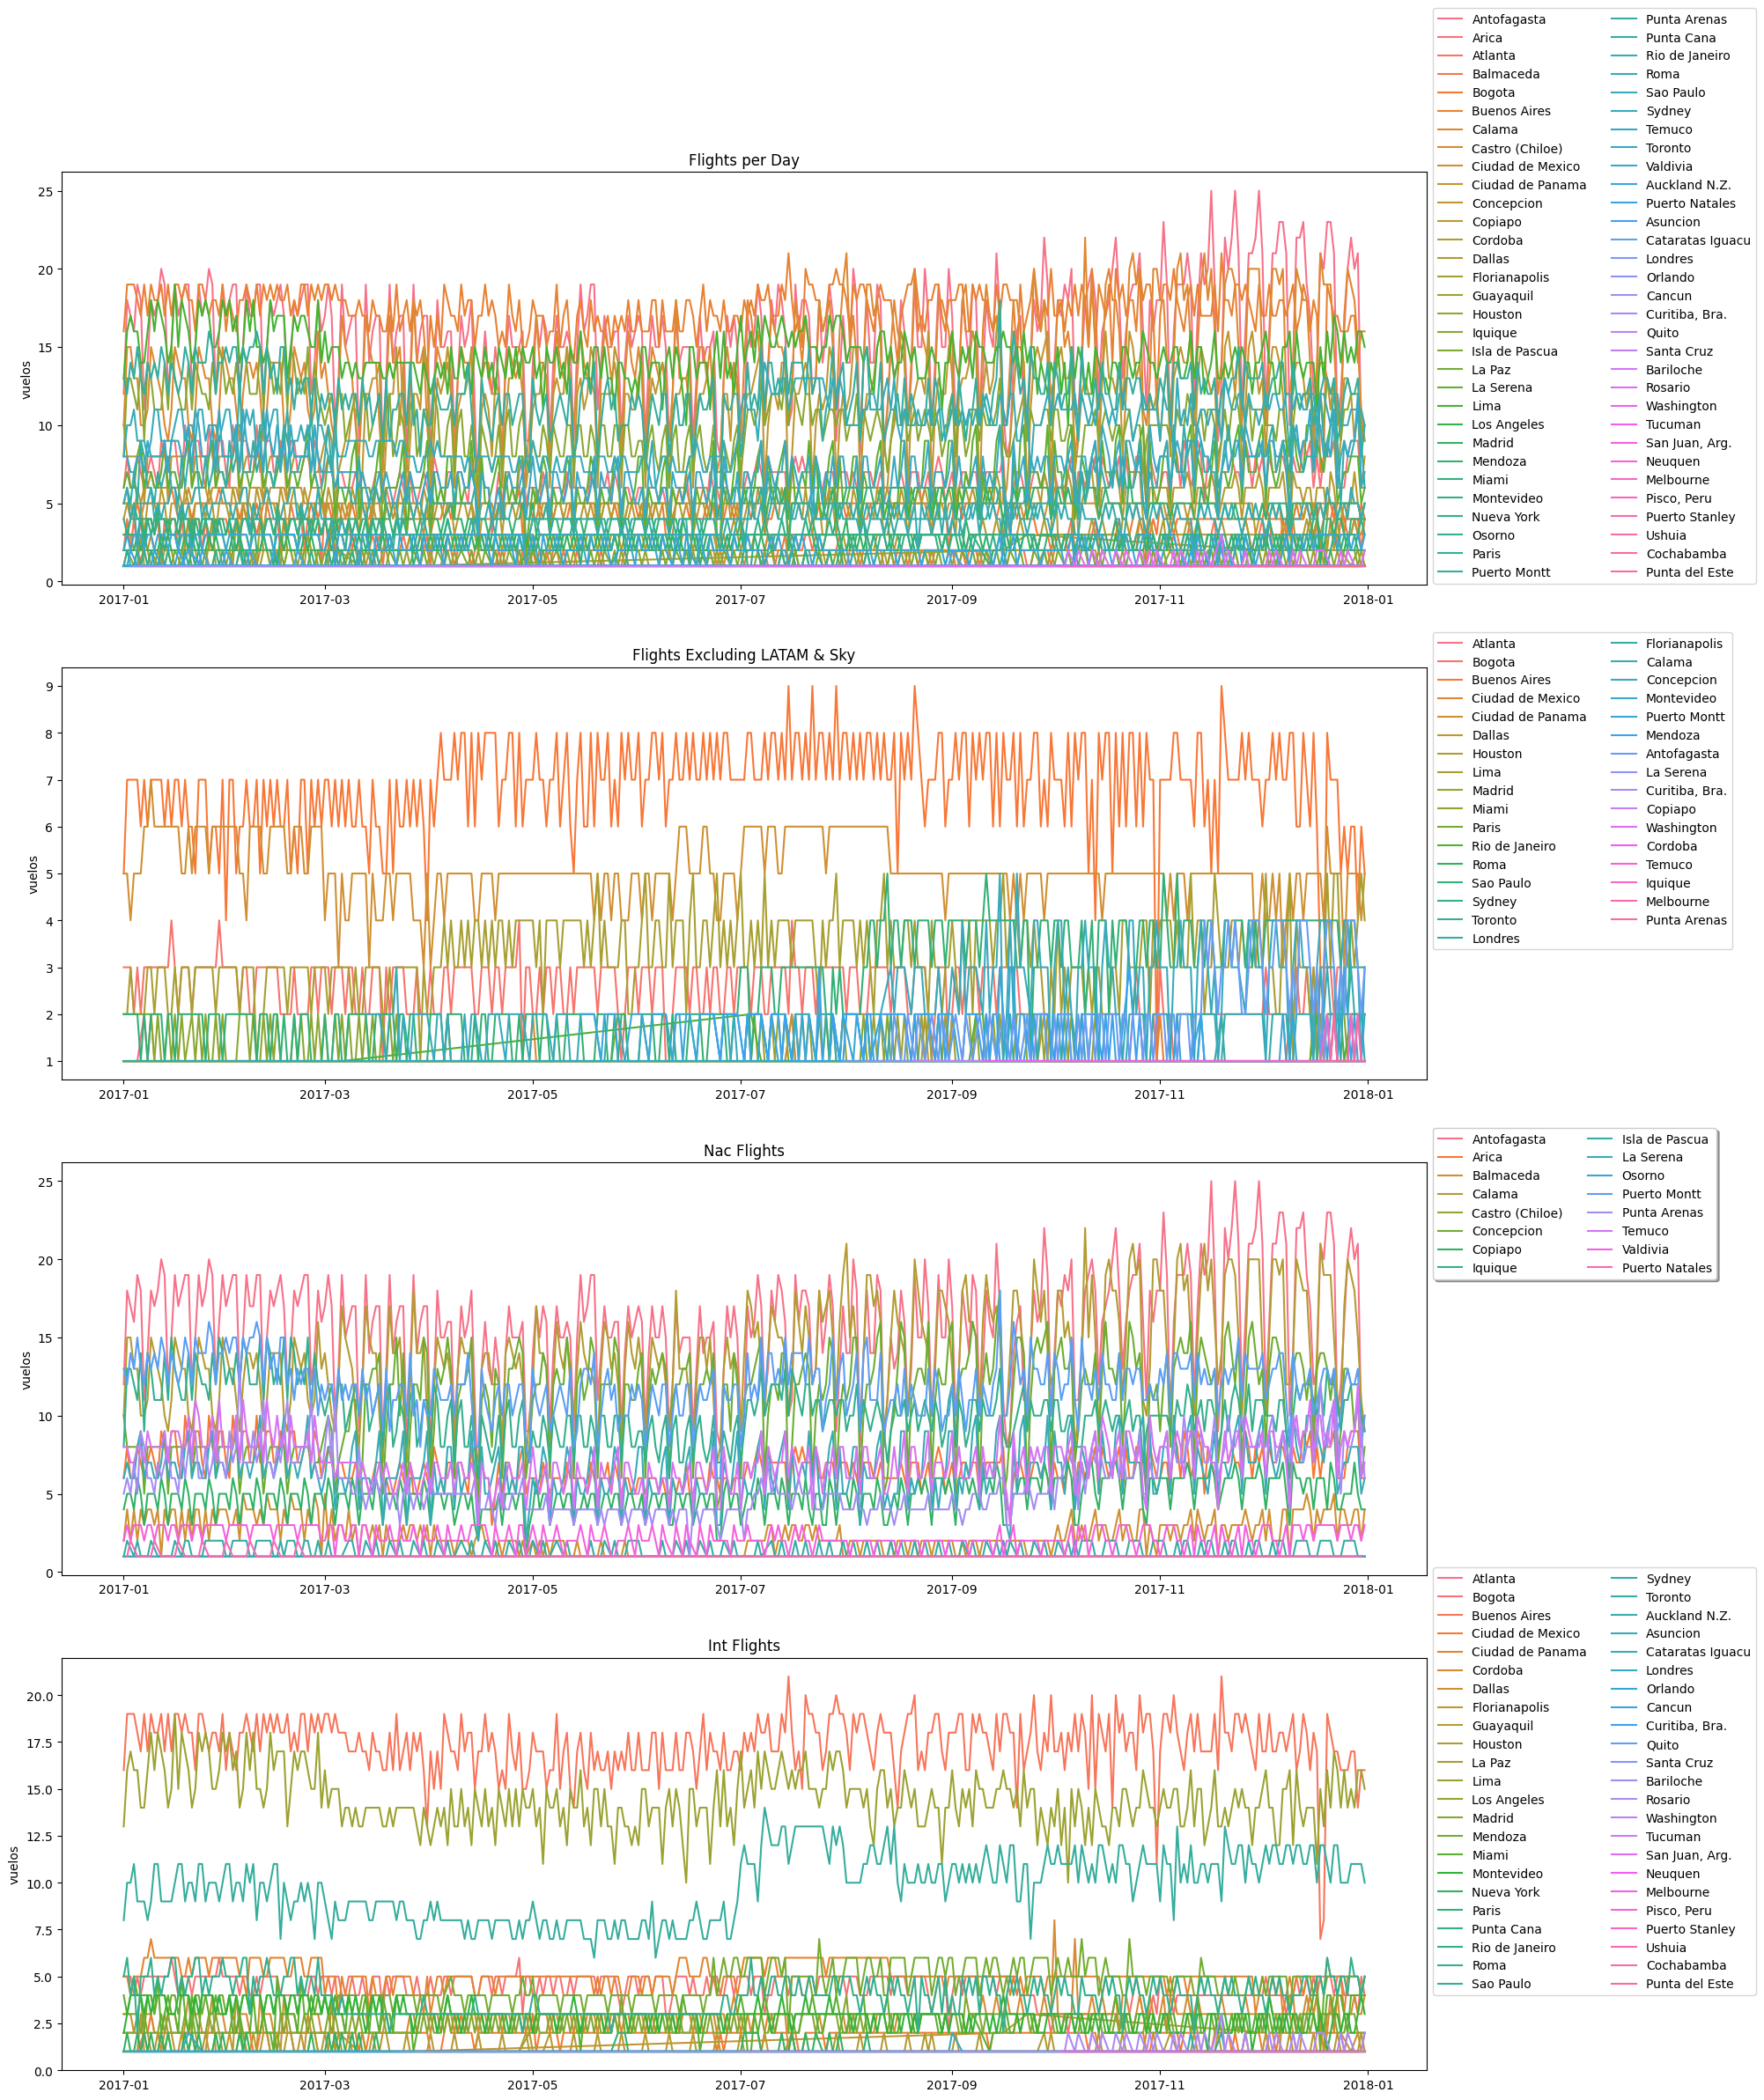

In [14]:
time_s_airlines(df, 'SIGLADES')

From this chart we can extract the following insights:

- **Flights per day:** There is no clear dominance from any destination, there are some destinations with lower flights but no clear winner.

- **Flighs Excluding LATAM & Sky:** Like we saw on the previous chart, excluding Latam & Sky leaves out a great amount of Nac Destinations. The amount of flights significantly decreaces

- **Nac Flights:** The destination *Antofagasta* is differenciated to the others at the start of the year. At the end the same with *Antofagasta* & *Calama*

- **Int Flights:** In terms of international market, *Buenos Aires*, *Lima* and *Sao Paulo* have a more significant share than the other destinations.

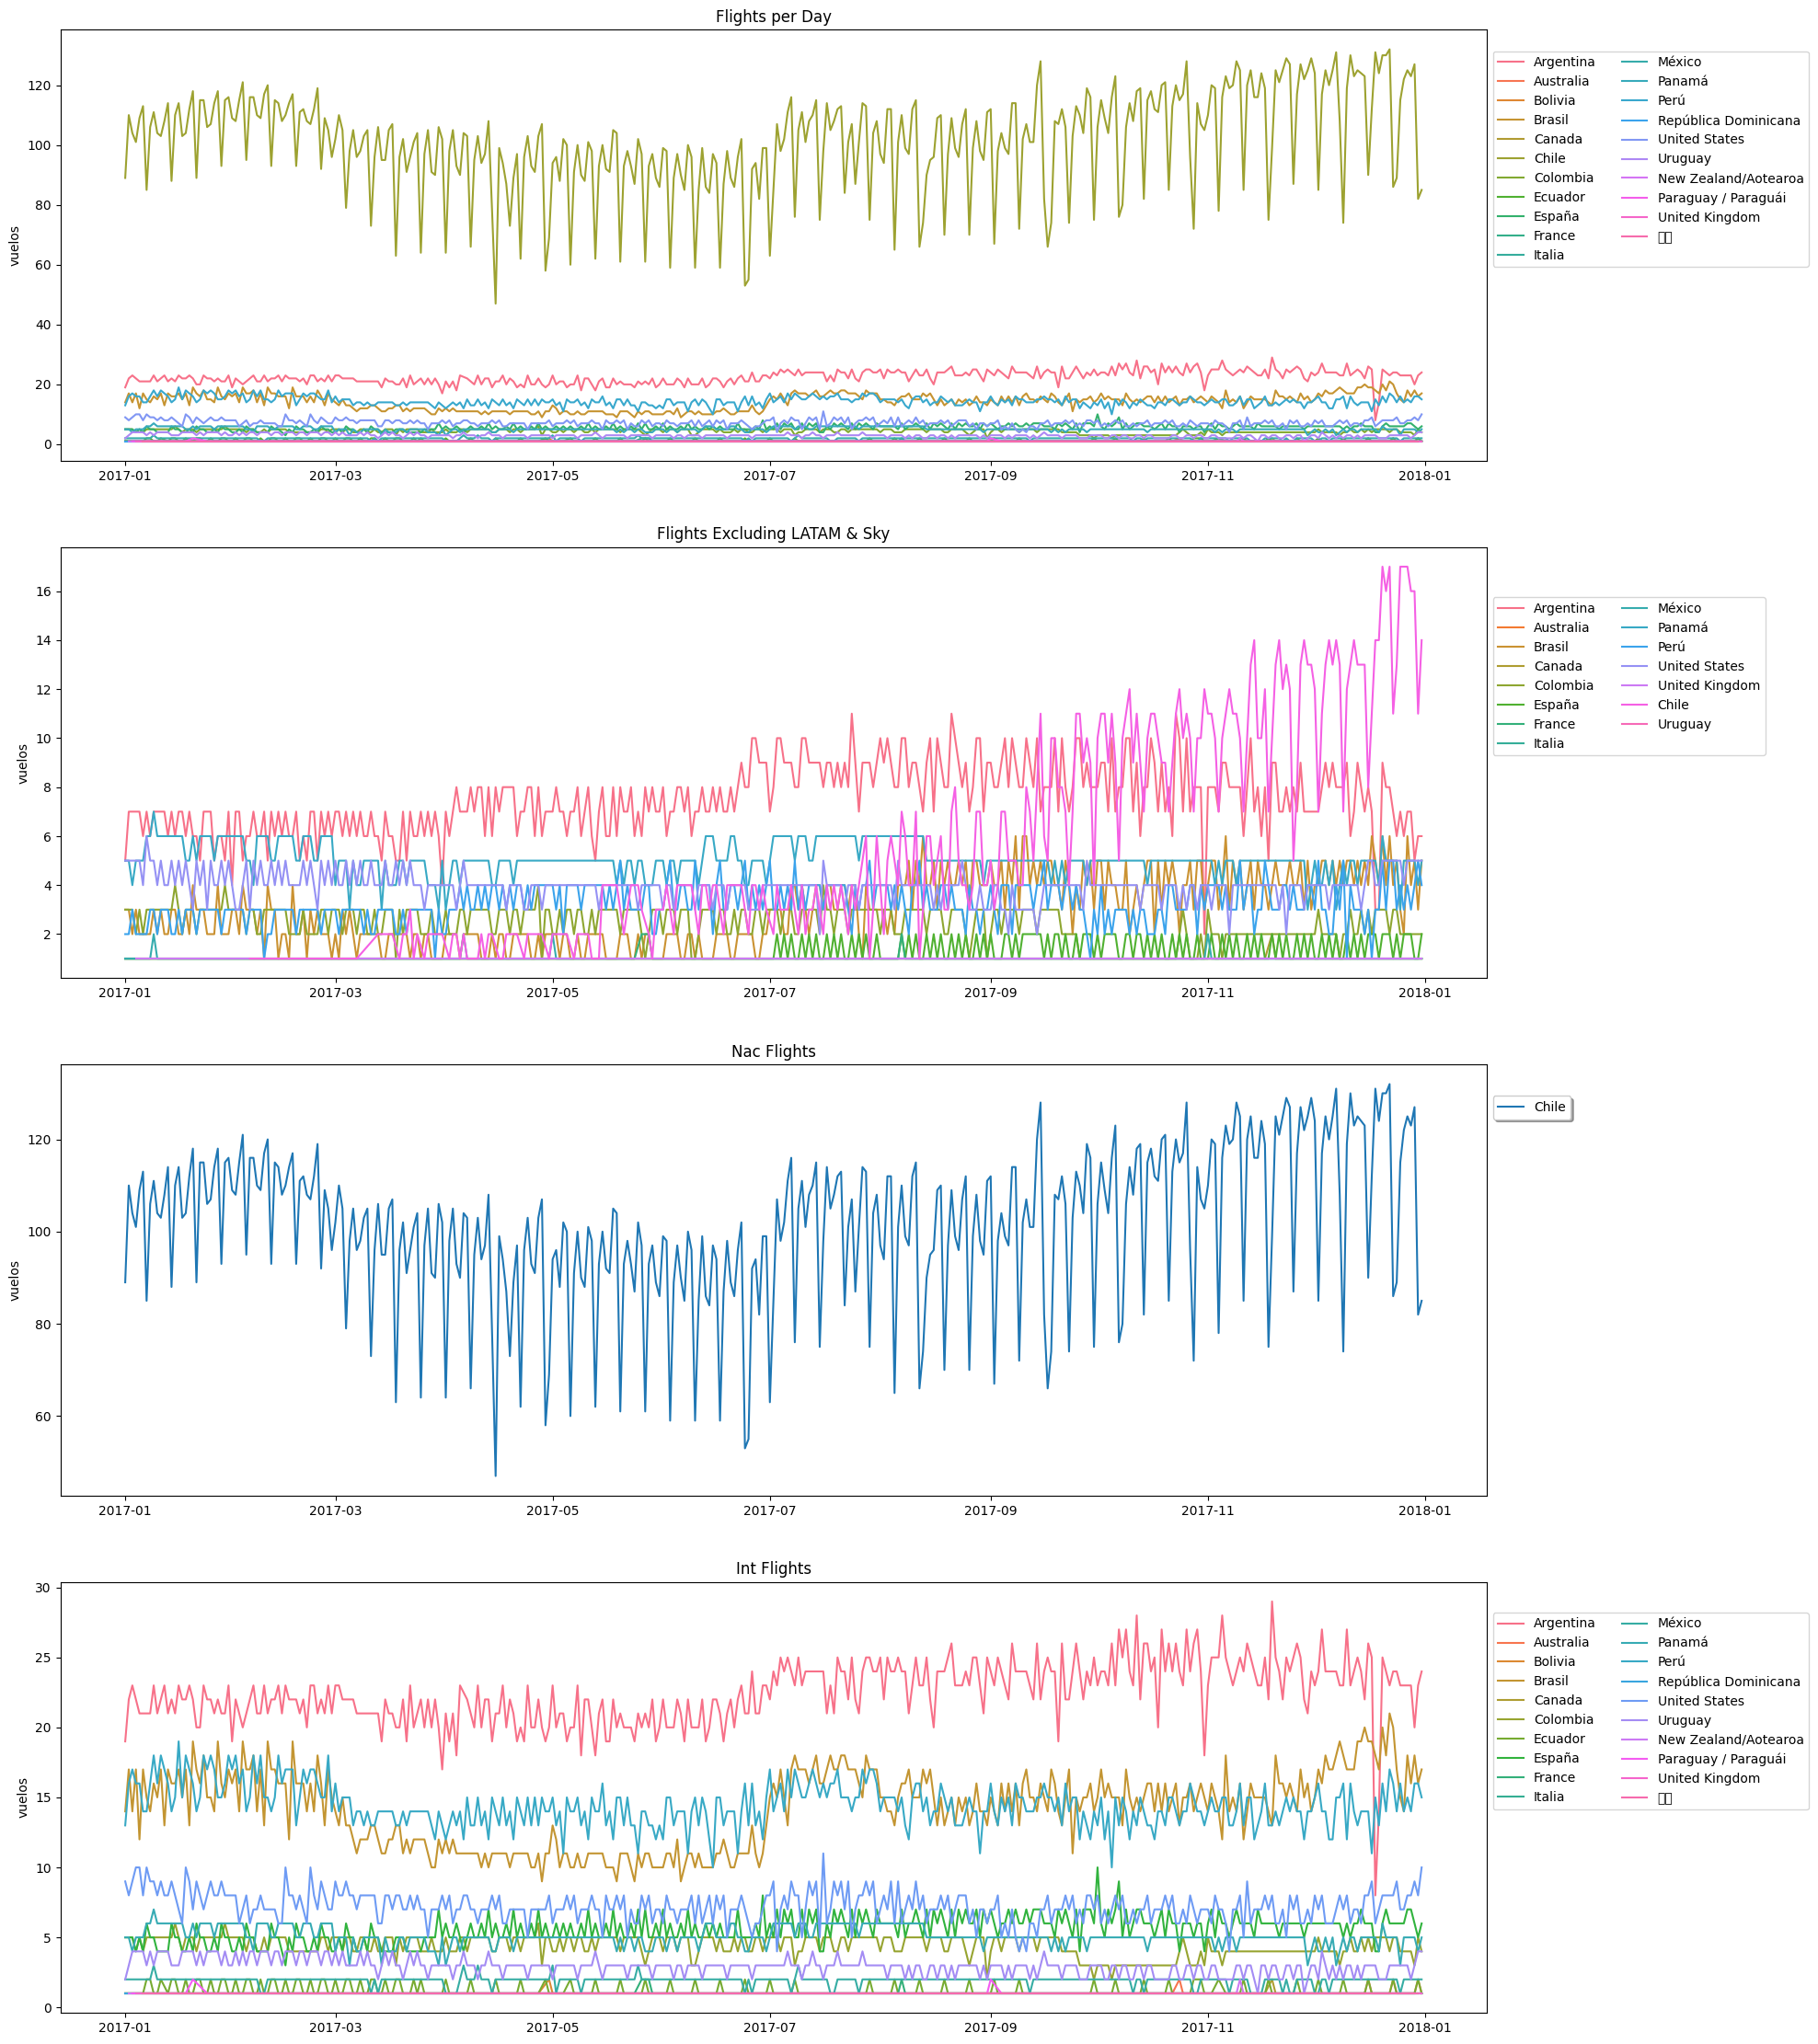

In [17]:
time_s_airlines(df, 'country_des')

Same as above Chart but, with the country aggregation generated on the geo_data function.

## Numerical Features

We try some plots on the Numerical Features

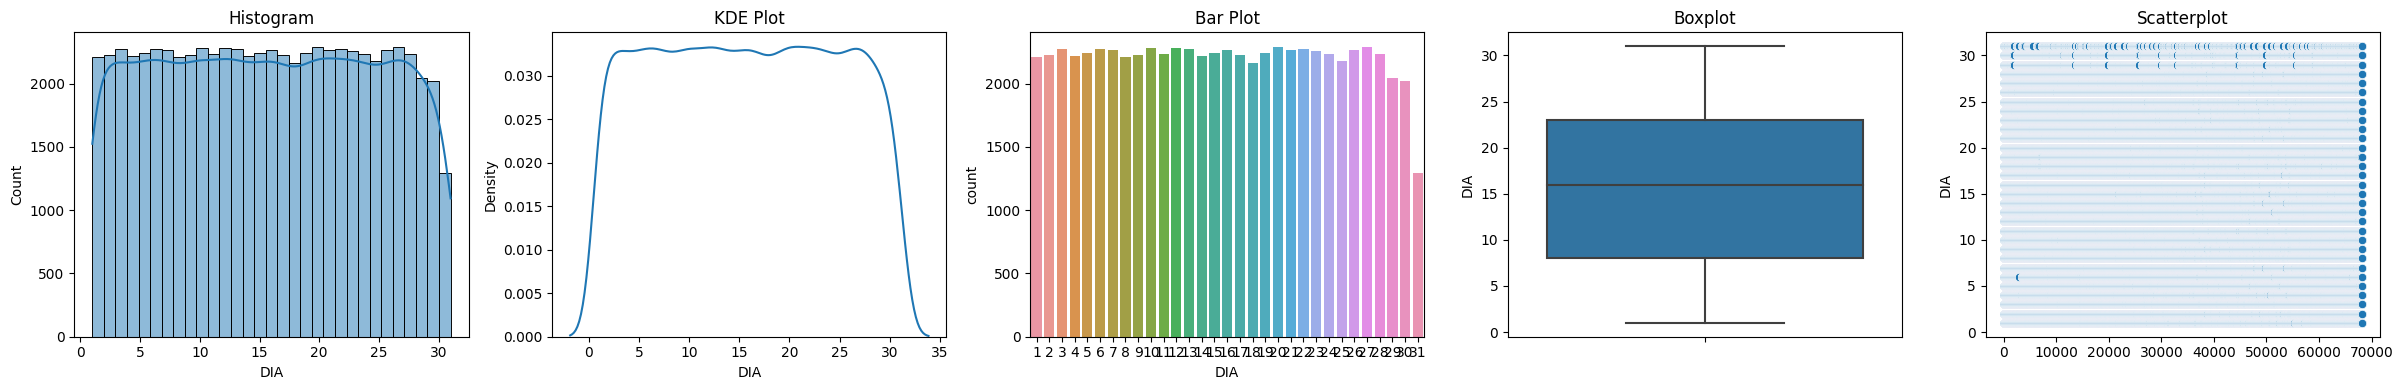

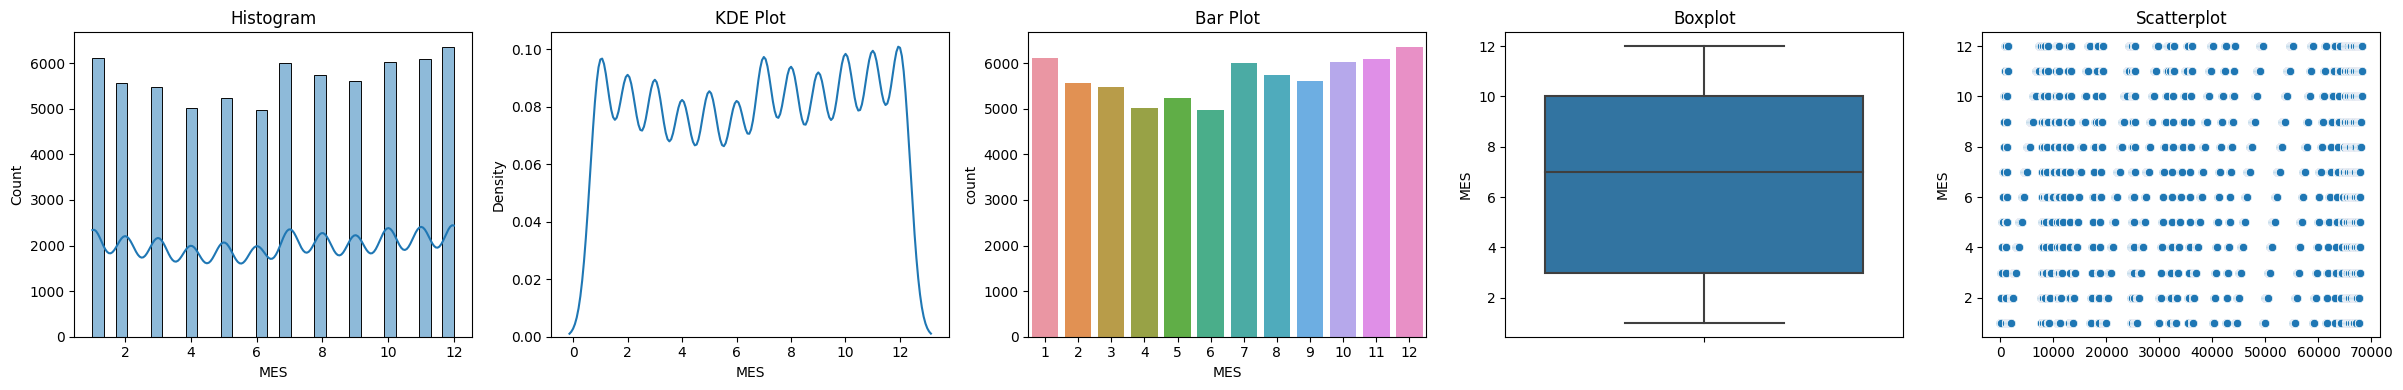

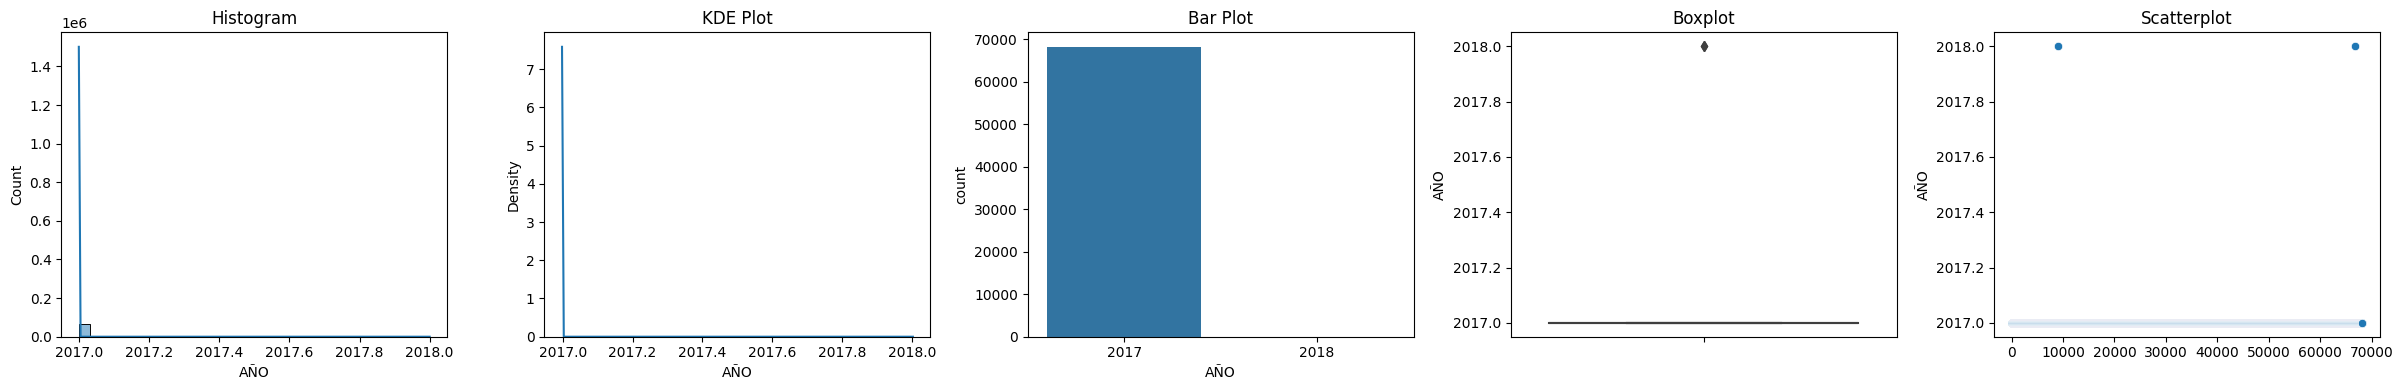

In [32]:
def plots(df, variable):
    if df[variable].dtype != object:
        # define figure size
        fig, ax = plt.subplots(1, 5, figsize=(24, 4))

        # histogram
        sns.histplot(df[variable], bins=31, kde=True, ax=ax[0])
        ax[0].set_title('Histogram')

        # KDE plot
        sns.kdeplot(df[variable], ax=ax[1])
        ax[1].set_title('KDE Plot')
        
        # bar plot
        sns.countplot(x=df[variable], ax=ax[2])
        ax[2].set_title('Bar Plot')

        # boxplot
        sns.boxplot(y=df[variable], ax=ax[3])
        ax[3].set_title('Boxplot')

        # scatterplot
        sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
        ax[4].set_title('Scatterplot')

        plt.tight_layout()
        plt.show()

for i in ['DIA', 'MES', 'AÑO', 'Vlo-O']:
    plots(df, i)

From this plots we can't say much, based on the original variables, flights between days & months are uniformly distributed.

There are some flights that started on 2018.

# 3) Examine the Behaviour


We add the insights generated by the previous analysis into specific columns and test if they help on the prediction of the delay

The consideration of the target variable is the following:

- $ Delay = mindiff > 0 $

In [52]:
def add_insights(df):
    """
    
    """

    df['delay'] = np.where(df['min_diff'] > 0, 1, 0)

    df['diff_code'] = np.where (df['Des-I'] != df['Des-O'], 1, 0)

    df['top_airline'] = np.where(df['OPERA'].isin(['Grupo LATAM','Sky Airline']),1,0)

    df['top3_destination_int'] = np.where(df['country_des'].isin(['Perú','Brasil','Argentina']),1,0)


    return df

In [53]:
df = add_insights(df)

<Axes: >

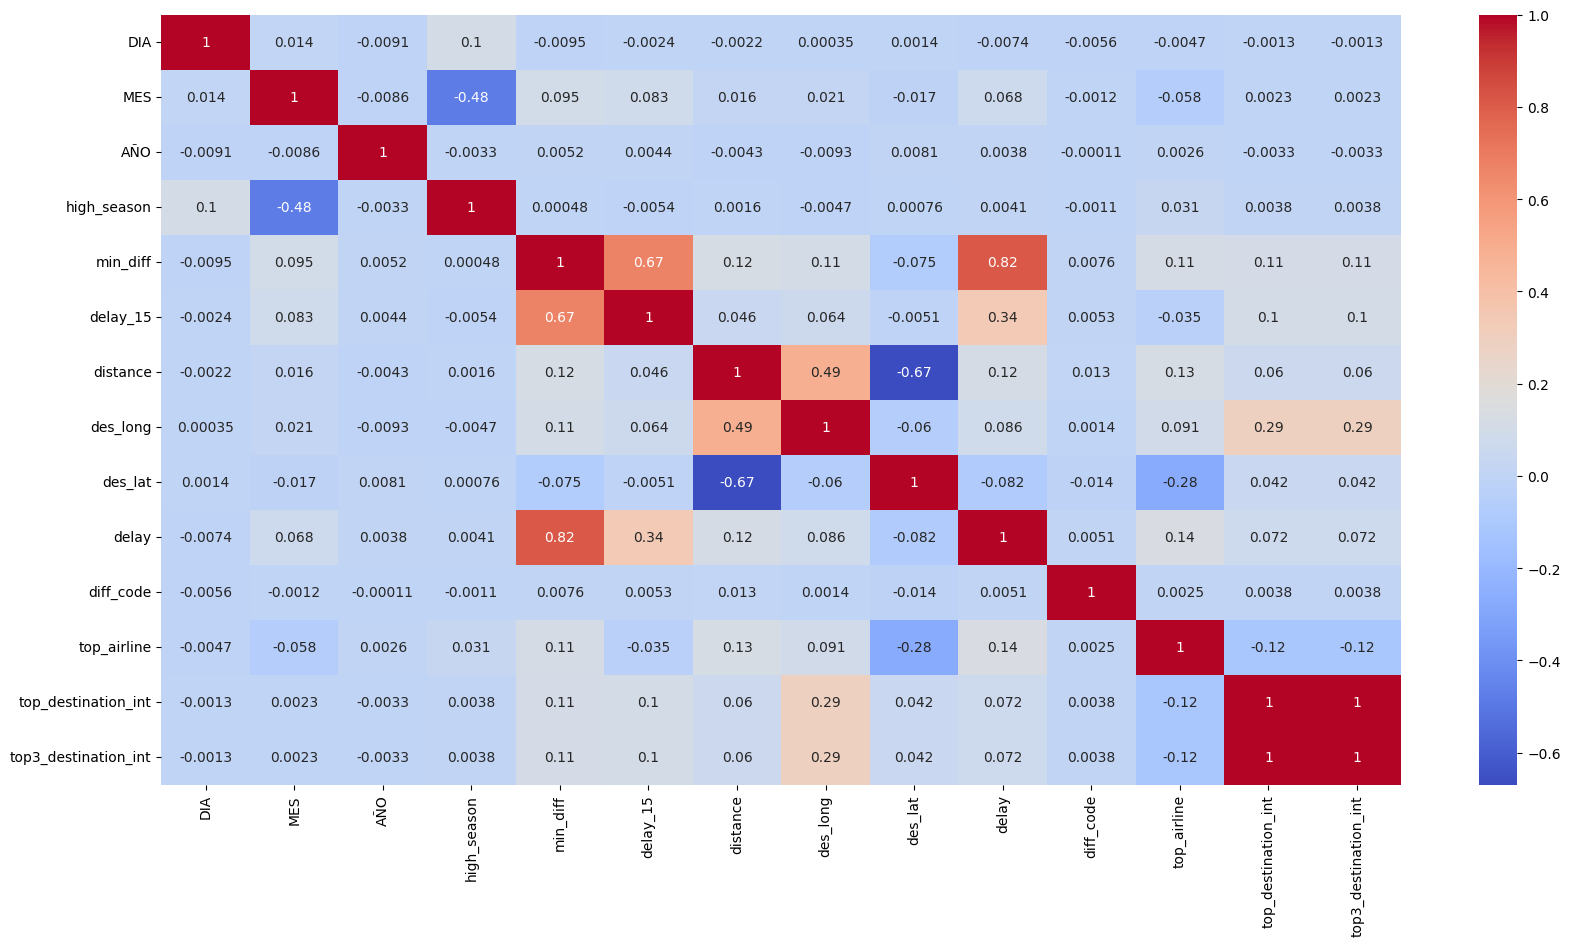

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(method = 'spearman'), annot=True, cmap='coolwarm')

# 4) Train the models

**Strategy**: 
- We will use December as Time Hold Out, for validation data set.



In [ ]:
#Armamos una matriz con los modelos 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability = True)))
models.append(('GBR', GradientBoostingClassifier()))
models.append(('BAGG', BaggingClassifier()))
models.append(('RDF', RandomForestClassifier()))

#Guardamos los resultados de cada modelo
results = []
names = []
scoring = 'accuracy'

#Pasamos los modelos por cross-validation
seed = 7
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle = True)
  cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = cv_results.mean(), cv_results.std()
  msg = pd.DataFrame(msg,columns = [name],index = ['Media Accuracy','Desvío Accuaracy'])
  print(msg)
 
#Armamos un boxplot con la comparación de los algoritmos
fig,title = plt.figure(figsize=(15,10)),plt.title("Comparación de algoritmos", fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()